In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

import udacityhelpers as udacity
from lanelines import *

In [3]:
import lanespipeline 

from compgraph import CompGraph, CompGraphRunner
import nxpd
nxpd.nxpdParams['show'] = 'ipynb'

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


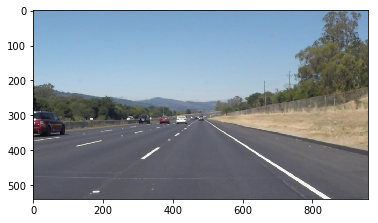

In [4]:
image = mpimg.imread('test_images/solidWhiteRight.jpg')

print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  

In [5]:
cg = lanespipeline.computational_graph
params = lanespipeline.parameters.copy()

print(params)

{'canny_lo': 70, 'right_offset': 0, 'max_line_gap': 1, 'rho': 1, 'blur_kernel': 11, 'left_offset': 50, 'canny_hi': 200, 'hough_threshold': 20, 'y_lim': 317, 'x_from': 450, 'x_to': 518, 'min_line_length': 7, 'theta': 0.017453292519943295}


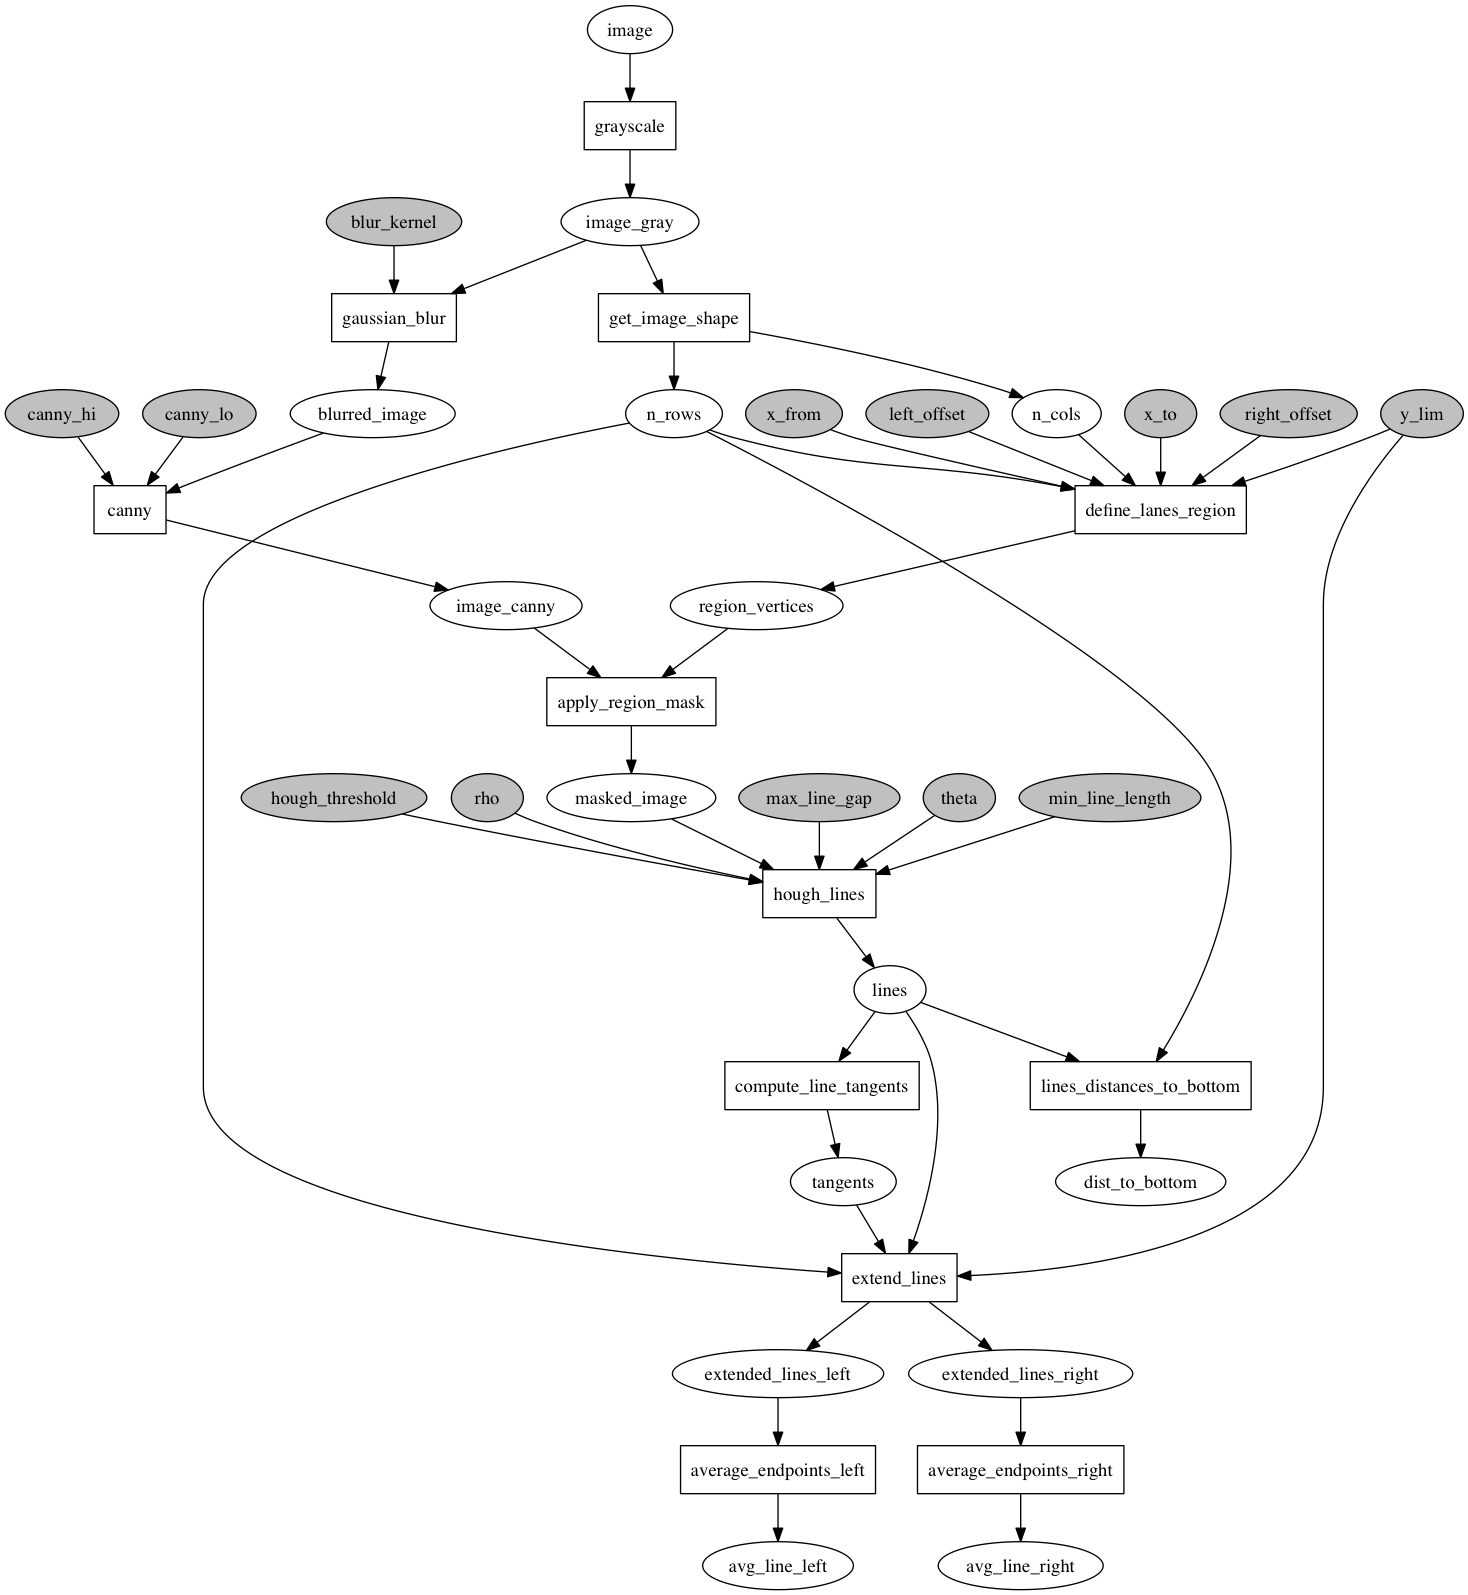

In [6]:
runner = CompGraphRunner(cg, frozen_tokens=lanespipeline.parameters)
nxpd.draw(runner.token_manager.to_networkx())

In [7]:
runner.run(image=image)

n_rows = runner.token_value('n_rows') 
lines = runner.token_value('lines')
tans = runner.token_value('tangents')
y_lim = runner.token_value('y_lim')
ext_lines_left = runner.token_value('extended_lines_left') 
ext_lines_right = runner.token_value('extended_lines_right') 
avg_line_left = runner.token_value('avg_line_left')
avg_line_right = runner.token_value('avg_line_right')
dist_to_bottom = runner.token_value('dist_to_bottom')

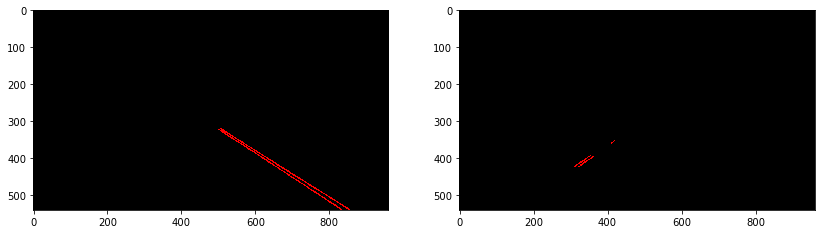

In [8]:
canvas_1 = np.zeros_like(image)
draw_lines_on_image(canvas_1, lines[tans > 0])

canvas_2 = np.zeros_like(image)
draw_lines_on_image(canvas_2, lines[tans < 0])

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.imshow(canvas_1)
plt.subplot(1, 2, 2)
plt.imshow(canvas_2)

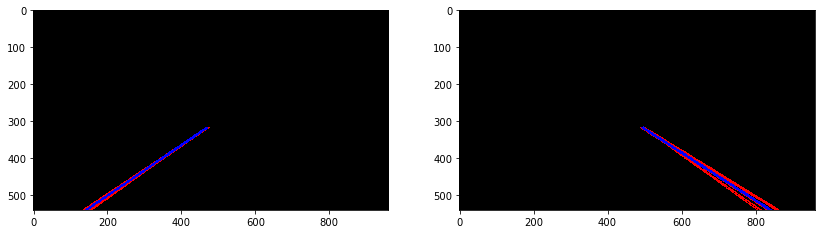

In [9]:
canvas_1 = np.zeros_like(image)
draw_lines_on_image(canvas_1, runner.token_value('extended_lines_left'))
draw_line(canvas_1, runner.token_value('avg_line_left'), color=[0, 0, 255], thickness=5)

canvas_2 = np.zeros_like(image)
draw_lines_on_image(canvas_2, runner.token_value('extended_lines_right'))
draw_line(canvas_2, runner.token_value('avg_line_right'), color=[0, 0, 255], thickness=5)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.imshow(canvas_1)
plt.subplot(1, 2, 2)
plt.imshow(canvas_2)

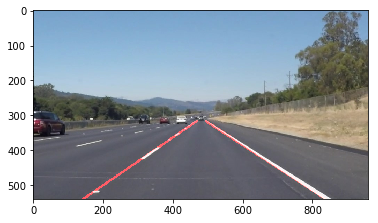

In [10]:
canvas = np.zeros_like(image)
draw_line(canvas, runner.token_value('avg_line_left'), color=[255, 0, 0], thickness=5)
draw_line(canvas, runner.token_value('avg_line_right'), color=[255, 0, 0], thickness=5)
viz_im = udacity.weighted_img(image, canvas, 1, 1, 0)

plt.imshow(viz_im)

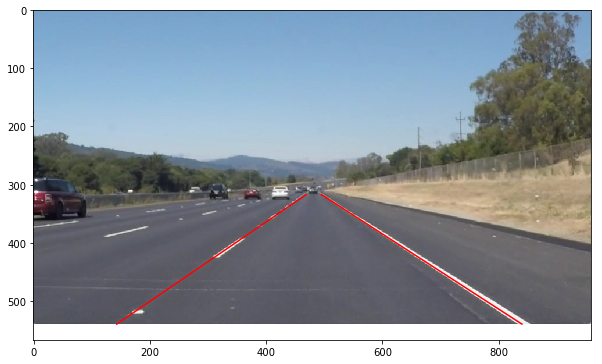

In [11]:
plt.figure(figsize=(10, 8))
plt.imshow(image)
plot_line(avg_line_left, color='r')
plot_line(avg_line_right, color='r')